# Effect of Inertial Weight
* Effect of increase in the inertial weight ($\omega$) value on the shifting of the sweet-spot in the ($c_1, c_2$) phase space. 

In [48]:
def fig_modifier(ax_):
    """
    Modifies the current axis
    
    Arguments:
    ax_ -- current figure axis
    
    Returns:
    Modified ax_
    """
    ax_.xaxis.set_ticks_position('bottom')
    ax_.yaxis.set_ticks_position('left')

    ax_.set_xticks(range(15)); ax.set_yticks(range(15))

    ax_.set_xticks([0.0, 2, 4, 6, 8, 10, 12, 14])
    ax_.set_yticks([0.0, 2, 4, 6, 8, 10, 12, 14])
    ax_.set_xticklabels([0.0, 0.50, 1.0, 1.50, 2.0, 2.50, 3.0, 3.5], size = 7.5)
    ax_.set_yticklabels([0.0, 0.50, 1.0, 1.50, 2.0, 2.50, 3.0, 3.5][::-1],
                       size = 7.5)

    ax_.xaxis.set_tick_params(size = 2, width = 0.25,  pad=1)
    ax_.yaxis.set_tick_params(size = 2, width = 0.25,  pad=1)

    ax_.set_xlabel(r'$c_1$', fontsize = 15, labelpad = 2)
    ax_.set_ylabel(r'$c_2$', fontsize = 15, labelpad = 12, rotation = 0)

    ax_.tick_params(axis='both', which='major', pad=2)

    for line_pos in np.arange(0.50, 14.0, 1): 
        ax_.axvline(line_pos, 0, 3, linewidth = 0.50, color = 'white')
        ax_.axhline(line_pos, 0, 3, linewidth = 0.50, color = 'white')

In [5]:
matplotlib.rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

In [2]:
fig_save_path = r"\\storage01.amolf.nl\data\AMOLF\users\singh\Martin"\
                r"\Evolutionary Design\Thesis Chapter\Chapter 2.0\Figures\Section 7"

In [4]:
%run "elegant_plot.ipynb" 

Populating the interactive namespace from numpy and matplotlib


In [6]:
import numpy as np 
from matplotlib.colors import LogNorm

import colormaps as cmaps
plt.register_cmap(name='viridis', cmap=cmaps.viridis)
plt.register_cmap(name='inferno', cmap=cmaps.inferno)
cmap = cmaps.inferno

C:\Users\singh\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


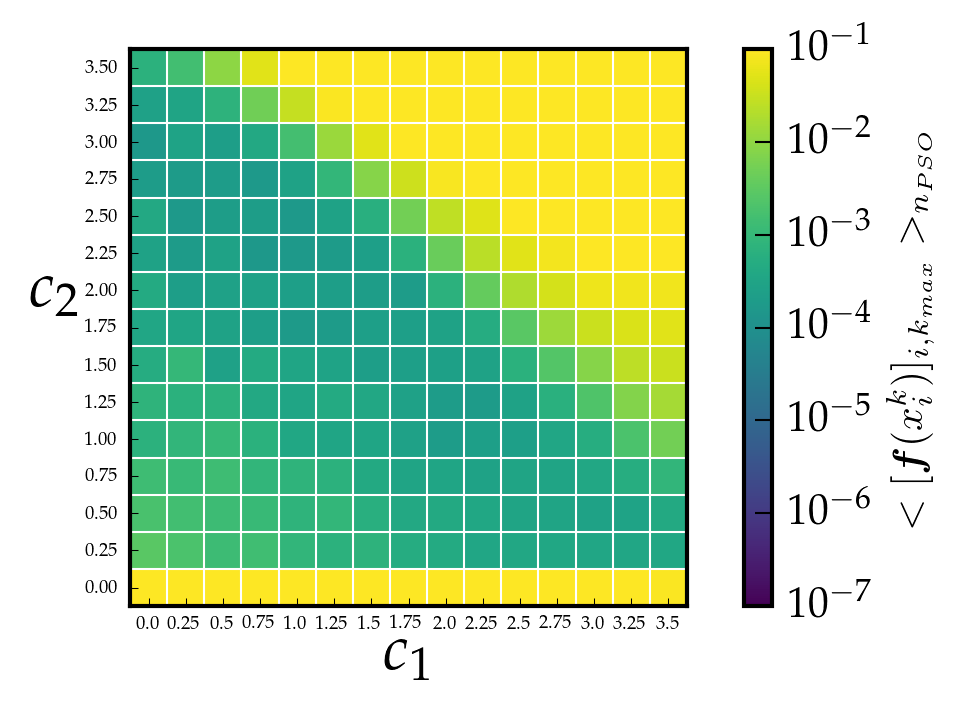

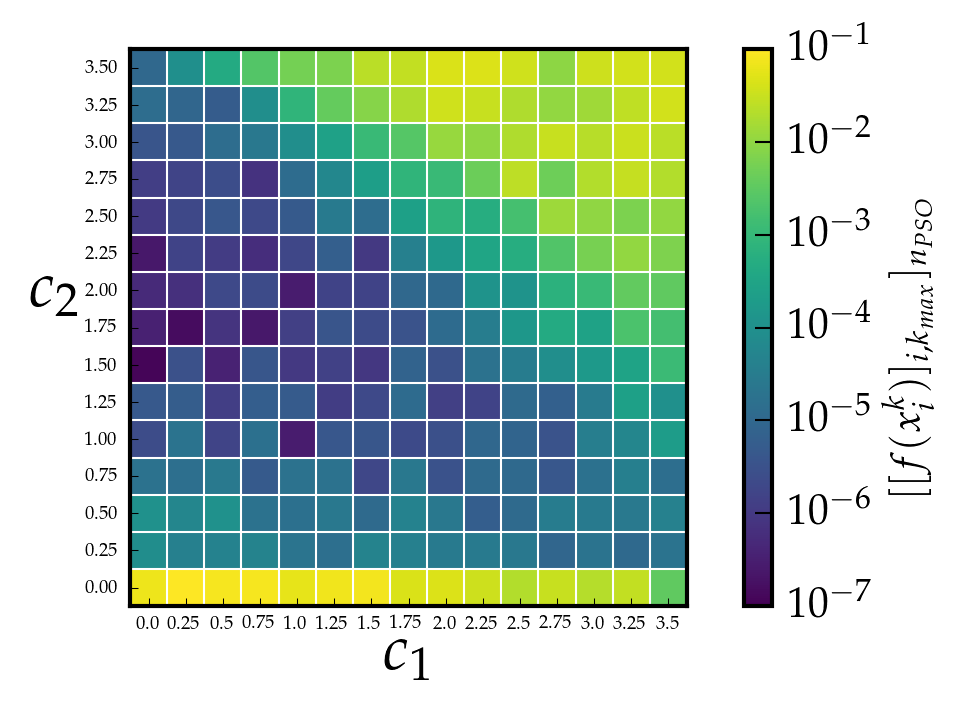

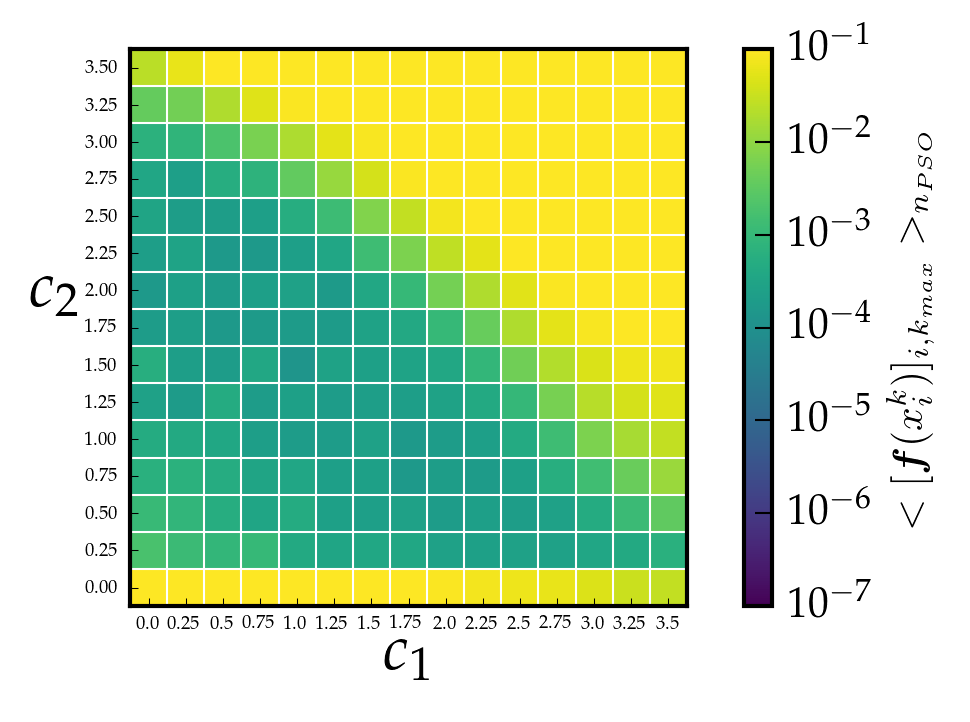

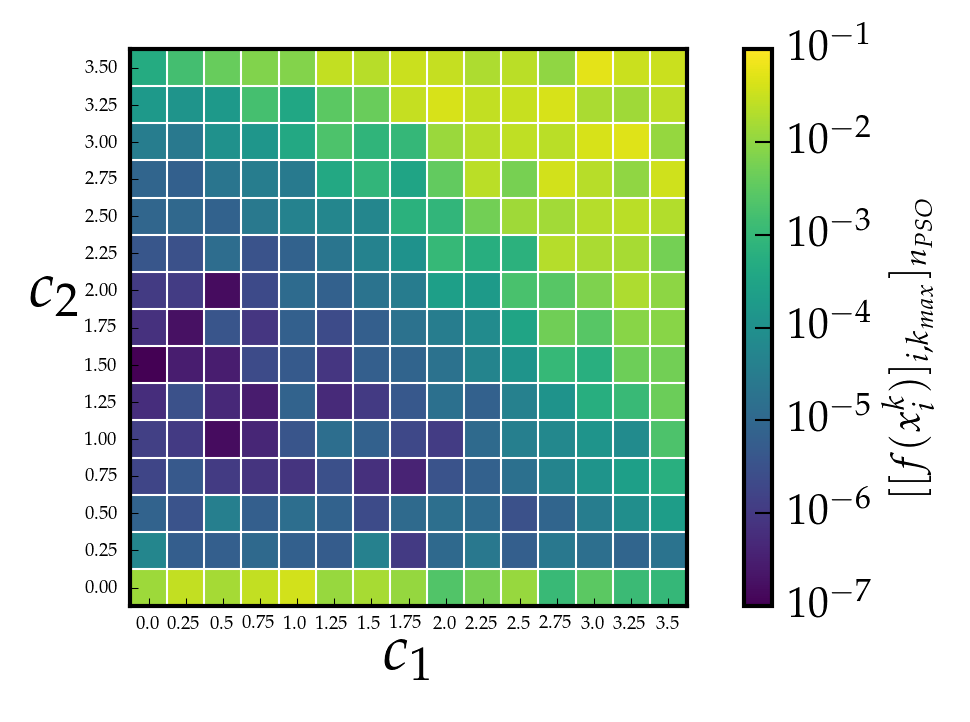

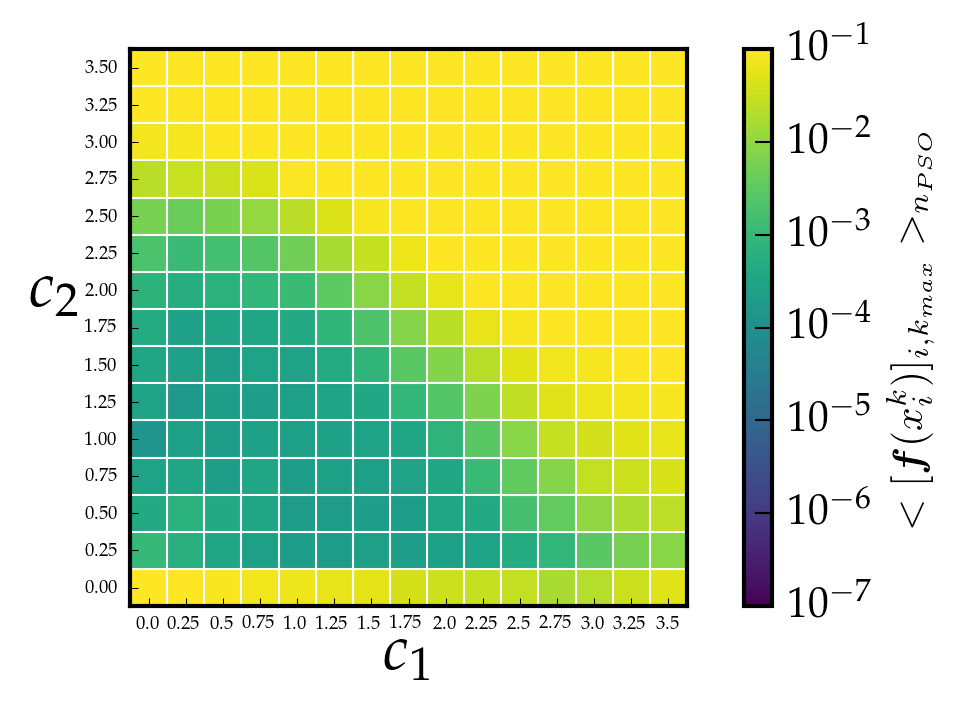

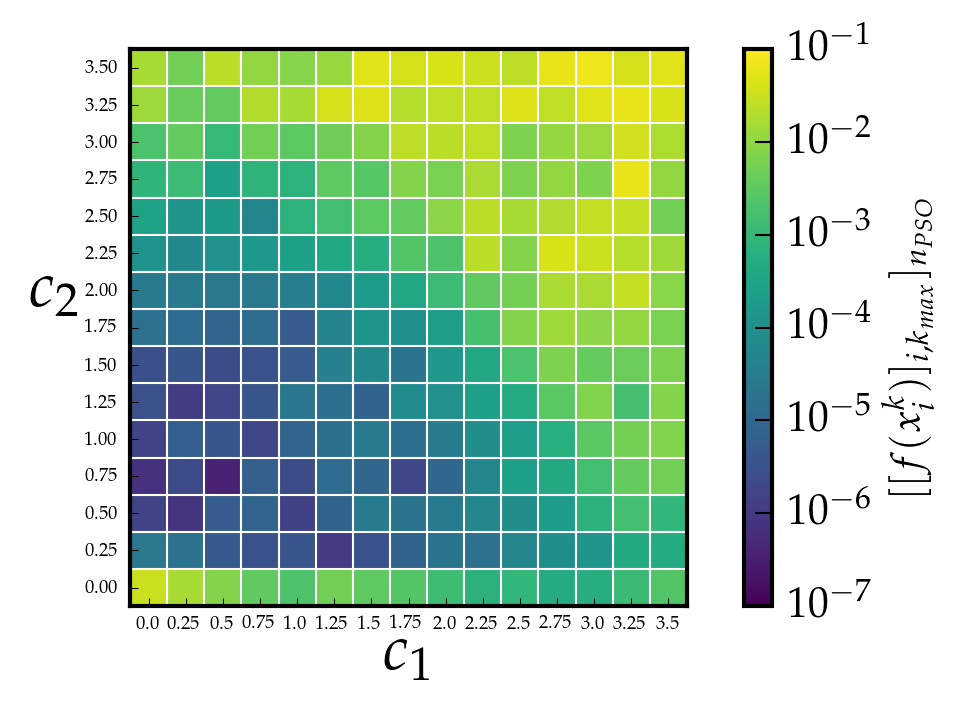

In [10]:
weights = [0.40, 0.60, 0.80]
for wt in weights:
    data = np.load(r"\\storage01\data\AMOLF\users\singh\Lisa PSO Runs"
               r"\New - MSE Cost Function\Horizontal Target Curve"
               r"\Weight - {0}\Data\best_cost_grid.npy".format("%.2f" % wt))
    data_mean = np.mean(data, axis = 0)

    fig, ax = plt.subplots(1)
    p = plt.imshow(np.flipud(data_mean), interpolation="nearest", 
                   cmap = cmap, norm = LogNorm(vmin = 1e-7, vmax = 1e-1))
    fig.colorbar(p, label =r'$<[\boldsymbol{f}(x_i^k)]_{i,k_{max}}>_{n_{PSO}}$')
    fig_modifier(ax)
    plt.savefig(fig_save_path + "\hyper_param_mean_weight_{0}.pdf".format("%.2f" % wt), format='pdf',
                bbox_inches='tight')
    plt.show()
    
    data_extremal = np.amin(data, axis = 0)
    fig, ax = plt.subplots(1)
    p = plt.imshow(np.flipud(data_extremal), interpolation="nearest", 
                   cmap = cmap, norm = LogNorm(vmin = 1e-7, vmax = 1e-1))
    fig.colorbar(p, label =r'$[[\boldsymbol{f}(x_i^k)]_{i,k_{max}}]_{n_{PSO}}$')
    fig_modifier(ax)
    plt.savefig(fig_save_path + "\hyper_param_extremal_weight_{0}.pdf".format("%.2f" % wt), format='pdf',
                bbox_inches='tight')
    plt.show()

# All the seperate figures combined within in one figure with one colorbar

C:\Users\singh\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


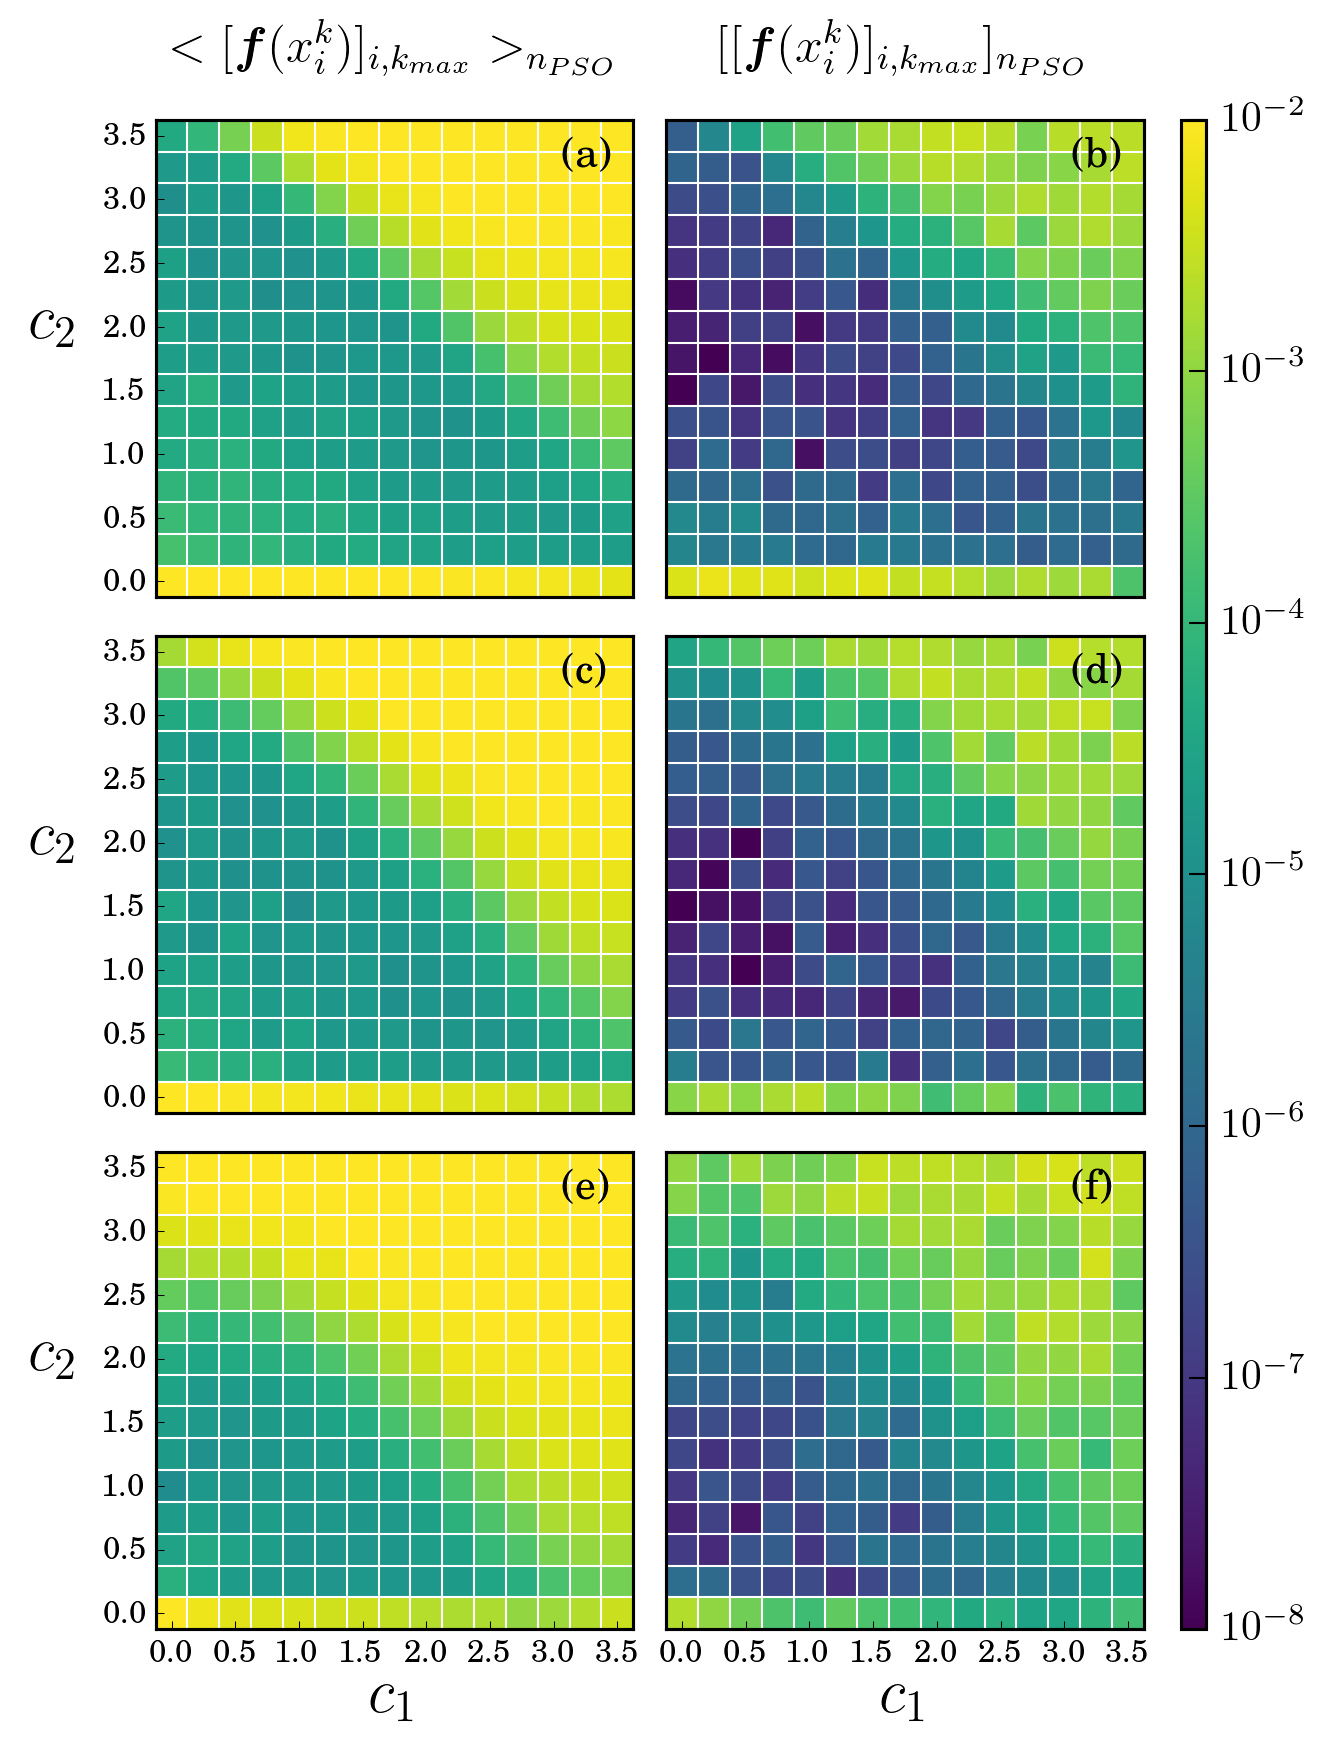

In [102]:
cmap = cmaps.viridis

data = np.load(r"\\storage01\data\AMOLF\users\singh\Lisa PSO Runs"
               r"\New - MSE Cost Function\Horizontal Target Curve"
               r"\Weight - 0.40\Data\best_cost_grid.npy")

fullfig(hf = 1*2.80)
mpl.rcParams['axes.linewidth'] = 0.75 
ax1 = plt.subplot(3,2,1)
ax2 = plt.subplot(3,2,2)
ax3 = plt.subplot(3,2,3)
ax4 = plt.subplot(3,2,4)
ax5 = plt.subplot(3,2,5)
ax6 = plt.subplot(3,2,6)
plt.subplots_adjust(hspace=0.08, wspace = 0.00)

data_mean = np.mean(data/16, axis = 0)
ax = ax1
p = ax.imshow(np.flipud(data_mean), interpolation="nearest", 
               cmap = cmap, norm = LogNorm(vmin = 1e-8, vmax = 1e-2))

#fig.colorbar(p,label =r'$<[\boldsymbol{f}(x_i^k)]_{i,k_{max}}}>_{n_{PSO}}$')
fig_modifier(ax1)
ax1.set_xticks([]); ax1.set_xlabel("")
ax1.set_title(r'$<[\boldsymbol{f}(x_i^k)]_{i,k_{max}}}>_{n_{PSO}}$', y=1.05)
#ax1.text(6.5,18.5,'(a)', size = 12)

data_extremal = np.amin(data/16, axis = 0)
ax = ax2
p = ax2.imshow(np.flipud(data_extremal), interpolation="nearest", 
               cmap = cmap, norm = LogNorm(vmin = 1e-8, vmax = 1e-2))
#plt.scatter([-100], [-100], c=[0], cmap=cmap, norm=norm)
plt.colorbar(p, ax = [ax1, ax2, ax3, ax4, ax5, ax6], aspect = 60, pad = 0.03)

ax2.set_title(r'$[[\boldsymbol{f}(x_i^k)]_{i,k_{max}}]_{n_{PSO}}$', y=1.05)
fig_modifier(ax2)
ax2.set_ylabel(""); ax2.set_yticks([])
ax2.set_xticks([]); ax2.set_xlabel("")
#ax2.text(6.5,18.5,'(b)', size = 12)

data = np.load(r"\\storage01\data\AMOLF\users\singh\Lisa PSO Runs"
               r"\New - MSE Cost Function\Horizontal Target Curve"
               r"\Weight - 0.60\Data\best_cost_grid.npy")

ax = ax3
data_mean = np.mean(data/16, axis = 0)
p = ax.imshow(np.flipud(data_mean), interpolation="nearest", 
               cmap = cmap, norm = LogNorm(vmin = 1e-8, vmax = 1e-2))

#fig.colorbar(p,label =r'$<[\boldsymbol{f}(x_i^k)]_{i,k_{max}}}>_{n_{PSO}}$')
fig_modifier(ax3)
ax3.set_xticks([]); ax3.set_xlabel("")
#ax1.set_title(r'$<[\boldsymbol{f}(x_i^k)]_{i,k_{max}}}>_{n_{PSO}}$')
#ax1.text(6.5,18.5,'(a)', size = 12)

data_extremal = np.amin(data/16, axis = 0)
ax = ax4
p = ax4.imshow(np.flipud(data_extremal), interpolation="nearest", 
               cmap = cmap, norm = LogNorm(vmin = 1e-8, vmax = 1e-2))

#ax2.set_title(r'$[[\boldsymbol{f}(x_i^k)]_{i,k_{max}}]_{n_{PSO}}$')
fig_modifier(ax4)
ax4.set_ylabel(""); ax4.set_yticks([])
ax4.set_xticks([]); ax4.set_xlabel("")
#ax2.text(6.5,18.5,'(b)', size = 12)

data = np.load(r"\\storage01\data\AMOLF\users\singh\Lisa PSO Runs"
               r"\New - MSE Cost Function\Horizontal Target Curve"
               r"\Weight - 0.80\Data\best_cost_grid.npy")
ax = ax5
data_mean = np.mean(data/16, axis = 0)
p = ax.imshow(np.flipud(data_mean), interpolation="nearest", 
               cmap = cmap, norm = LogNorm(vmin = 1e-8, vmax = 1e-2))

#fig.colorbar(p,label =r'$<[\boldsymbol{f}(x_i^k)]_{i,k_{max}}}>_{n_{PSO}}$')
fig_modifier(ax5)
#ax1.set_title(r'$<[\boldsymbol{f}(x_i^k)]_{i,k_{max}}}>_{n_{PSO}}$')
#ax1.text(6.5,18.5,'(a)', size = 12)

data_extremal = np.amin(data/16, axis = 0)
ax = ax6
p = ax6.imshow(np.flipud(data_extremal), interpolation="nearest", 
               cmap = cmap, norm = LogNorm(vmin = 1e-8, vmax = 1e-2))

#ax2.set_title(r'$[[\boldsymbol{f}(x_i^k)]_{i,k_{max}}]_{n_{PSO}}$')
fig_modifier(ax6)
ax6.set_ylabel(""); ax6.set_yticks([])

ax1.text(12.25, 1,'(a)', size = 10); ax2.text(12.25, 1,'(b)', size = 10)
ax3.text(12.25, 1,'(c)', size = 10); ax4.text(12.25, 1,'(d)', size = 10)
ax5.text(12.25, 1,'(e)', size = 10); ax6.text(12.25, 1,'(f)', size = 10)

#subplotlabel('(a)',  'upper right',ax = ax1, size = 10)
plt.savefig(r"C:\Users\singh\Dropbox\Nitin Singh\Thesis\Evolutionary Design\Figures\Section 7\hyper_param_var_w.png", format='png',
            bbox_inches='tight')
